In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv(r'C:\Users\Temp\Downloads\train_F3fUq2S.csv')

In [3]:
test = pd.read_csv(r'C:\Users\Temp\Downloads\test_Bk2wfZ3 (1).csv')

In [4]:
train.shape,test.shape

((1888, 22), (762, 21))

In [5]:
train.isna().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [6]:
train['times_of_day'].unique()

array(['Noon', 'Morning', 'Evening'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [8]:
time = train['times_of_day']# Here I did onthotencodeing on times of day as they were categorical data.
time = pd.get_dummies(time,drop_first=True)
time.head()

,Morning,Noon
0,0,1
1,1,0
2,0,1
3,0,0
4,0,1


In [9]:
train = pd.concat([train,time],axis=1)# joined the onehotencoded data with the initial traindata
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,Morning,Noon
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,14,0.103079,0,1
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,10,0.700000,1,0
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,0,0,0,0,16,0.002769,0,1
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,10,0.010868,0,0
4,5,3,80,10011,27,5,1,Noon,6,26,...,1,0,0,0,0,0,14,0.142826,0,1


In [10]:
train.drop('times_of_day',axis=1,inplace=True)

In [11]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,Morning,Noon
0,1,3,76,10439,39,5,1,6,26,3,...,0,0,0,0,0,0,14,0.103079,0,1
1,2,3,54,2570,256,5,1,2,11,0,...,0,0,0,0,0,0,10,0.700000,1,0
2,3,3,59,12801,16,5,1,2,11,3,...,1,0,0,0,0,0,16,0.002769,0,1
3,4,3,74,11037,30,4,0,15,9,4,...,0,0,0,0,0,0,10,0.010868,0,0
4,5,3,80,10011,27,5,1,6,26,3,...,1,0,0,0,0,0,14,0.142826,0,1


In [12]:
train['sender'].unique()

array([ 3, 10,  0,  2, 14, 12, 15,  7, 11,  9,  1,  6], dtype=int64)

In [13]:
train.shape



(1888, 23)

In [14]:
Y = train['click_rate']
Y = np.array(Y).reshape(-1,1)

In [15]:
X = train.drop('click_rate',axis=1)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
me = MinMaxScaler()


In [18]:
train.corr()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,Morning,Noon
campaign_id,1.000000,0.443314,-0.052252,0.200128,0.028225,0.036410,0.051932,0.289416,0.209435,0.117558,...,-0.006662,NaN,-0.128840,-0.002232,-0.041955,-0.058105,-0.104905,0.053315,0.117693,0.018658
sender,0.443314,1.000000,-0.102559,0.197929,0.056891,-0.046928,-0.059499,0.188444,0.070689,0.100454,...,0.020928,NaN,-0.105279,-0.046900,0.024099,-0.071096,-0.132554,-0.031398,0.029973,0.018684
subject_len,-0.052252,-0.102559,1.000000,0.427326,-0.224770,-0.033574,-0.056666,0.012601,-0.007108,0.400213,...,0.120273,NaN,0.080303,0.125134,0.033410,0.100584,-0.021855,-0.180143,-0.071913,0.048537
body_len,0.200128,0.197929,0.427326,1.000000,-0.496146,-0.089146,-0.079255,0.026781,-0.027747,0.559353,...,0.184035,NaN,-0.043931,0.051123,0.022431,0.023734,-0.075754,-0.247866,-0.025787,0.121477
mean_paragraph_len,0.028225,0.056891,-0.224770,-0.496146,1.000000,0.003221,-0.012964,0.037475,-0.054066,-0.170012,...,-0.096086,NaN,-0.043173,-0.032096,0.006765,-0.037435,-0.110896,0.178042,0.087961,-0.061786
day_of_week,0.036410,-0.046928,-0.033574,-0.089146,0.003221,1.000000,0.720599,-0.058760,0.000249,-0.037789,...,-0.032476,NaN,-0.013571,-0.037122,-0.013822,0.012735,0.081693,0.086372,0.160453,0.117133
is_weekend,0.051932,-0.059499,-0.056666,-0.079255,-0.012964,0.720599,1.000000,-0.063763,-0.015759,-0.033464,...,-0.033968,NaN,-0.007504,-0.033757,-0.036255,-0.009789,0.046638,0.114138,0.225921,0.133220
category,0.289416,0.188444,0.012601,0.026781,0.037475,-0.058760,-0.063763,1.000000,0.007144,-0.023931,...,-0.101411,NaN,0.100071,0.166200,0.068450,0.189839,-0.026602,-0.167756,-0.003131,-0.192685
product,0.209435,0.070689,-0.007108,-0.027747,-0.054066,0.000249,-0.015759,0.007144,1.000000,0.027486,...,-0.104653,NaN,0.013122,-0.018291,-0.060512,-0.110753,0.058073,0.121602,-0.008672,0.062886
no_of_CTA,0.117558,0.100454,0.400213,0.559353,-0.170012,-0.037789,-0.033464,-0.023931,0.027486,1.000000,...,0.092320,NaN,-0.037244,0.041797,-0.015229,-0.015649,-0.007979,-0.172637,0.002502,0.075819


In [19]:
train['is_timer'].unique()

array([0], dtype=int64)

In [20]:
train.drop('is_timer',axis =1,inplace=True)

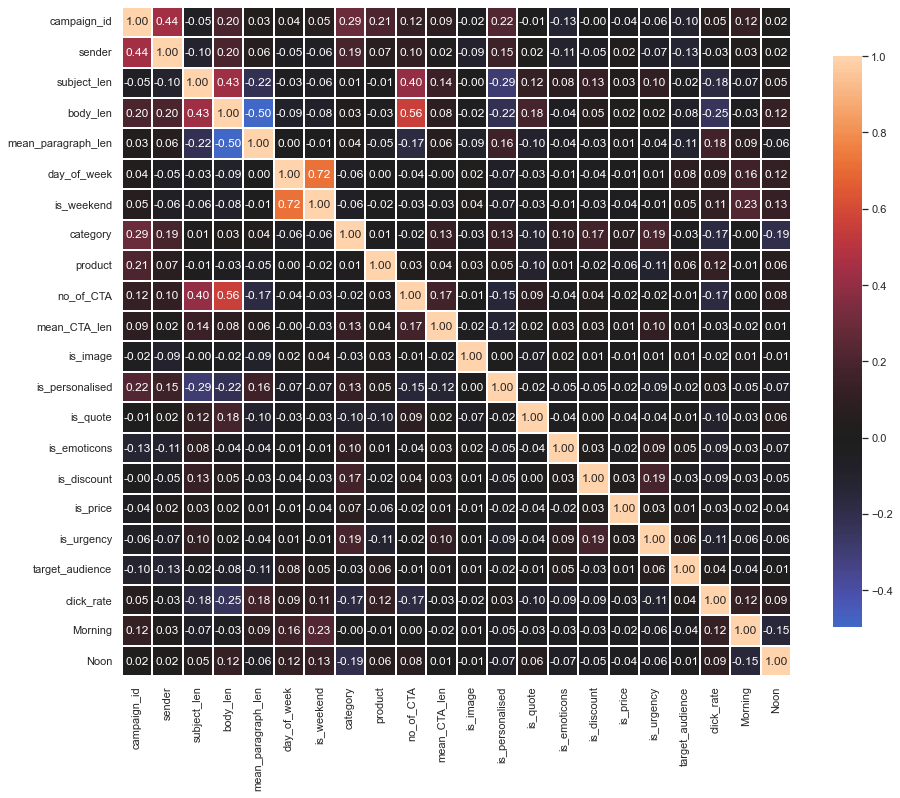

In [21]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=1.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(train)

In [22]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()


In [23]:
from sklearn.preprocessing import StandardScaler
se = StandardScaler()

In [24]:
X = X.drop('is_timer',axis=1)

In [25]:
trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.3,random_state=42)

In [26]:
reg.fit(trainX,trainY)

C:\Users\Temp\AppData\Local\Temp/ipykernel_6704/767227191.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(trainX,trainY)


RandomForestRegressor()

In [27]:
reg.score(testX,testY)

0.4658461950386178

In [28]:
trainX

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,Morning,Noon
236,237,3,74,6950,51,2,0,15,9,3,...,2,0,0,1,0,0,0,12,0,0
551,552,3,85,13065,29,0,0,1,5,3,...,1,0,2,0,0,0,0,1,0,0
1762,1763,15,94,38846,10,3,0,15,1,4,...,1,0,1,0,0,0,0,12,0,1
1494,1495,10,57,9053,39,0,0,15,1,1,...,1,1,3,0,0,0,0,12,0,0
208,209,3,118,15906,24,4,0,6,26,10,...,1,0,1,0,0,0,0,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1131,11,197,15177,28,2,0,15,9,2,...,1,0,0,0,1,5000,1,9,0,0
1294,1295,10,69,10922,24,4,0,15,9,1,...,2,0,0,0,0,0,1,12,0,0
860,861,3,112,13452,25,4,0,1,5,4,...,0,0,3,0,0,0,0,12,0,0
1459,1460,10,55,7718,55,3,0,9,34,2,...,0,0,0,0,0,0,0,12,0,0


In [29]:
train['is_price'].unique()

array([    0,  5499,  8000,  4999,  1399,  5000,  1000, 14999],
      dtype=int64)

In [30]:
me = MinMaxScaler()
Xscaled = me.fit_transform(X)




In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(Xscaled,Y,test_size=0.3,random_state=42)

In [32]:
reg.fit(xtrain,ytrain)

C:\Users\Temp\AppData\Local\Temp/ipykernel_6704/260496706.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(xtrain,ytrain)


RandomForestRegressor()

In [33]:
reg.score(xtest,ytest)

0.45170969018146623

In [34]:
from sklearn.svm import SVR
svm = SVR()

In [35]:
svm.fit(xtrain,ytrain)

C:\Program Data\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [36]:
import xgboost as xgb

In [37]:
!pip install xgboost

In [38]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [39]:
xg_reg.fit(xtrain,ytrain)

[15:58:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, ...)

In [40]:
preds = xg_reg.predict(xtest)

In [41]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(ytest, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.185142


In [42]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [43]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[15:58:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:58:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:58:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [44]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.421623,0.000891,0.421621,0.002130
1,0.382013,0.000775,0.382038,0.002183
2,0.346489,0.000683,0.346527,0.002288
3,0.314647,0.000731,0.314784,0.002390
4,0.286175,0.000721,0.286363,0.002442


In [45]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.075153
Name: test-rmse-mean, dtype: float64


In [46]:
preds

array([0.20564982, 0.20564982, 0.20564982, 0.20564982, 0.20564982,
       0.20564982, 0.20564982, 0.20564982, 0.20564982, 0.20564982,
       0.20564982, 0.20564982, 0.20564982, 0.20564982, 0.20564982,
       0.20564982, 0.20564982, 0.20564982, 0.20564982, 0.20564982,
       0.20564982, 0.20564982, 0.20564982, 0.20564982, 0.20564982,
       0.20564982, 0.20564982, 0.2884943 , 0.20564982, 0.20564982,
       0.20564982, 0.20564982, 0.20564982, 0.20564982, 0.20564982,
       0.20564982, 0.20564982, 0.20564982, 0.20564982, 0.20564982,
       0.20564982, 0.20564982, 0.20564982, 0.20564982, 0.20564982,
       0.20564982, 0.20564982, 0.24313839, 0.20564982, 0.20564982,
       0.20564982, 0.20564982, 0.20564982, 0.20564982, 0.20564982,
       0.20564982, 0.20564982, 0.20564982, 0.20564982, 0.20564982,
       0.20564982, 0.20564982, 0.20564982, 0.20564982, 0.20564982,
       0.20564982, 0.20564982, 0.20564982, 0.20564982, 0.20564982,
       0.20564982, 0.20564982, 0.20564982, 0.20564982, 0.20564

In [47]:
test

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2646,3,72,9081,46,0,0,Evening,15,9,...,28,0,0,0,0,0,0,0,0,7
758,2647,3,58,10537,40,3,0,Evening,2,11,...,27,0,0,0,0,0,0,0,0,16
759,2648,3,100,9132,19,2,0,Evening,15,9,...,23,0,0,0,0,0,0,0,0,15
760,2649,3,88,1451,75,1,0,Noon,2,11,...,22,0,0,1,0,0,0,0,0,10


In [48]:
time = test['times_of_day']# Here I did onthotencodeing on times of day as they were categorical data.
time = pd.get_dummies(time,drop_first=True)
time.head()

,Morning,Noon
0,0,1
1,1,0
2,0,0
3,0,0
4,0,1


In [49]:
test = pd.concat([test,time],axis=1)# joined the onehotencoded data with the initial traindata
test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,Morning,Noon
0,1889,3,61,12871,11,6,1,Noon,6,26,...,0,0,0,1,0,0,0,14,0,1
1,1890,3,54,2569,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,10,1,0
2,1891,3,88,1473,78,4,0,Evening,2,11,...,0,1,0,0,0,0,0,10,0,0
3,1892,3,88,1473,78,3,0,Evening,2,11,...,0,1,0,0,0,0,0,10,0,0
4,1893,3,78,9020,29,3,0,Noon,6,26,...,0,0,0,0,0,0,0,14,0,1


In [50]:
test.drop('times_of_day',axis=1,inplace=True)

In [51]:
test['is_timer'].unique()

array([0], dtype=int64)

In [52]:
test.drop('is_timer',axis=1,inplace=True)

In [53]:
test.shape

(762, 21)

In [54]:
d = test.drop('campaign_id',axis=1)

In [55]:
d = me.fit_transform(d)

In [56]:
d

array([[0.14285714, 0.19685039, 0.28892687, ..., 0.875     , 0.        ,
        1.        ],
       [0.14285714, 0.16929134, 0.05725466, ..., 0.625     , 1.        ,
        0.        ],
       [0.14285714, 0.30314961, 0.03260772, ..., 0.625     , 0.        ,
        0.        ],
       ...,
       [0.14285714, 0.3503937 , 0.20484393, ..., 0.9375    , 0.        ,
        0.        ],
       [0.14285714, 0.30314961, 0.03211298, ..., 0.625     , 0.        ,
        1.        ],
       [0.14285714, 0.18503937, 0.23643969, ..., 0.0625    , 0.        ,
        0.        ]])

In [57]:
xtest.shape

(567, 21)

In [58]:
d.shape

(762, 20)

In [59]:
Y1 = train['click_rate']
Y1 = np.array(Y1).reshape(-1,1)

In [60]:
Y1.shape

(1888, 1)

In [63]:
Y1.shape,X1.shape

((1888, 1), (1888, 20))

In [62]:
X1 = train.drop(['campaign_id','click_rate'],axis=1)

In [64]:
# to check which features are important
from sklearn.ensemble import ExtraTreesRegressor
sel = ExtraTreesRegressor()
sel.fit(X1,Y1)

C:\Users\Temp\AppData\Local\Temp/ipykernel_6704/1960801369.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  sel.fit(X1,Y1)


ExtraTreesRegressor()

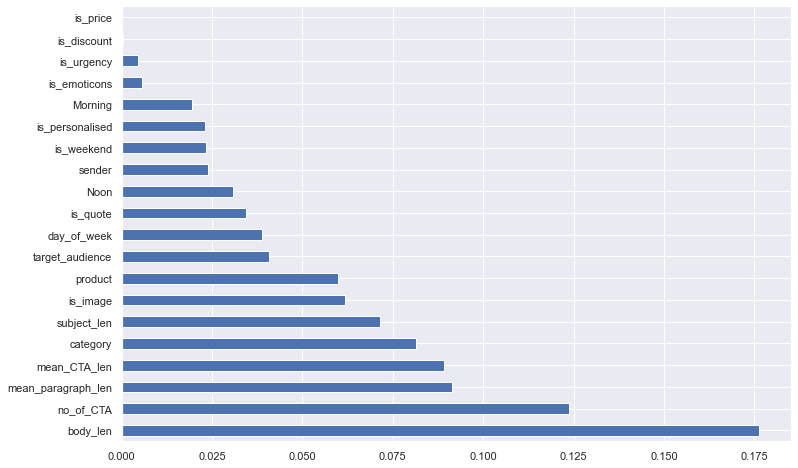

In [65]:
plt.figure(figsize=(12,8))
feature  = pd.Series(sel.feature_importances_,index=X1.columns)
feature.nlargest(20).plot(kind='barh')
plt.show()
# Here we can see  that body_len is the most important feature 

In [66]:
# is_price is_discount,is_urgency,is_emotiicons
X1.drop(['is_price','is_discount','is_urgency','is_emoticons'],axis=1,inplace=True)

In [67]:
X1.columns

Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'category', 'product', 'no_of_CTA',
       'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
       'target_audience', 'Morning', 'Noon'],
      dtype='object')

In [68]:
Y1

array([[0.10307898],
       [0.7       ],
       [0.00276891],
       ...,
       [0.00828938],
       [0.01201361],
       [0.00364388]])

In [69]:
X1.drop('is_weekend',axis=1,inplace=True)

In [70]:
X1train,X1test,Y1train,Y1test = train_test_split(X1,Y1,test_size=0.25,random_state=42)

In [71]:
reg.fit(X1train,Y1train)

C:\Users\Temp\AppData\Local\Temp/ipykernel_6704/1686633201.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X1train,Y1train)


RandomForestRegressor()

In [72]:
reg.score(X1test,Y1test)

0.4908258724030129

In [73]:
X1['sender'].unique()

array([ 3, 10,  0,  2, 14, 12, 15,  7, 11,  9,  1,  6], dtype=int64)

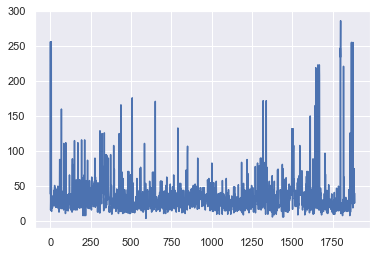

In [74]:
plt.plot(X1['mean_paragraph_len'])

In [75]:
#150
X1['is_quote'].unique()

array([0, 1, 2, 3, 4, 6, 5], dtype=int64)

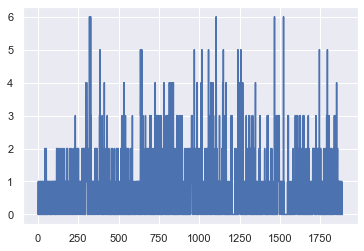

In [76]:
plt.plot(X1['is_quote'])

In [77]:
list = []#removing index where paragraphlen >= 150  because there were very few of them
for i in range(X1.shape[0]):
    if X1['mean_paragraph_len'][i] >= 150:
        list.append(i)

In [78]:


list

[1,
 5,
 6,
 69,
 438,
 508,
 651,
 1320,
 1339,
 1611,
 1612,
 1642,
 1646,
 1658,
 1659,
 1660,
 1667,
 1668,
 1669,
 1798,
 1799,
 1800,
 1818,
 1867,
 1869,
 1877]

In [79]:
train.drop(list,axis=0,inplace=True)

In [80]:
train.reset_index(inplace=True)

In [81]:
train.drop('index',axis=1,inplace=True)

In [82]:
train

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,Morning,Noon
0,1,3,76,10439,39,5,1,6,26,3,...,0,0,0,0,0,0,14,0.103079,0,1
1,3,3,59,12801,16,5,1,2,11,3,...,0,1,0,0,0,0,16,0.002769,0,1
2,4,3,74,11037,30,4,0,15,9,4,...,0,0,0,0,0,0,10,0.010868,0,0
3,5,3,80,10011,27,5,1,6,26,3,...,0,1,0,0,0,0,14,0.142826,0,1
4,8,3,60,12117,17,4,0,6,26,4,...,0,1,0,0,0,0,14,0.166998,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,1884,3,88,1451,75,2,0,2,11,0,...,0,1,0,0,0,0,10,0.350746,0,1
1858,1885,3,58,10537,40,2,0,2,11,5,...,0,0,0,0,0,0,11,0.004728,0,0
1859,1886,3,89,11050,26,1,0,15,9,4,...,0,0,0,0,0,0,6,0.008289,0,0
1860,1887,3,58,10537,40,1,0,2,11,5,...,0,0,0,0,0,0,16,0.012014,0,0


In [83]:
X1['is_personalised'].unique()

array([0, 1], dtype=int64)

In [84]:
reg.score(X1test,Y1test)

0.4908258724030129

In [85]:
campaign = test['campaign_id']

In [86]:
test

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,Morning,Noon
0,1889,3,61,12871,11,6,1,6,26,3,...,1,0,0,1,0,0,0,14,0,1
1,1890,3,54,2569,256,5,1,2,11,0,...,0,0,0,0,0,0,0,10,1,0
2,1891,3,88,1473,78,4,0,2,11,0,...,1,0,1,0,0,0,0,10,0,0
3,1892,3,88,1473,78,3,0,2,11,0,...,1,0,1,0,0,0,0,10,0,0
4,1893,3,78,9020,29,3,0,6,26,2,...,0,0,0,0,0,0,0,14,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2646,3,72,9081,46,0,0,15,9,4,...,0,0,0,0,0,0,0,7,0,0
758,2647,3,58,10537,40,3,0,2,11,5,...,0,0,0,0,0,0,0,16,0,0
759,2648,3,100,9132,19,2,0,15,9,2,...,0,0,0,0,0,0,0,15,0,0
760,2649,3,88,1451,75,1,0,2,11,0,...,0,0,1,0,0,0,0,10,0,1


In [87]:
list = []
for i in range(X1.shape[0]):
    if X1['is_personalised'][i] == 1:
        list.append(i)

In [88]:
len(list)

107

In [89]:
X1.columns

Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'category', 'product', 'no_of_CTA', 'mean_CTA_len',
       'is_image', 'is_personalised', 'is_quote', 'target_audience', 'Morning',
       'Noon'],
      dtype='object')

In [90]:
testX1 = test[['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'category', 'product', 'no_of_CTA', 'mean_CTA_len',
       'is_image', 'is_personalised', 'is_quote', 'target_audience', 'Morning',
       'Noon']]

In [91]:
reg.predict(testX1)

array([0.06820003, 0.58725307, 0.16314755, 0.16376628, 0.12303737,
       0.0287244 , 0.00766705, 0.02185686, 0.01085163, 0.02225632,
       0.02090891, 0.01812888, 0.0120447 , 0.01702305, 0.01006175,
       0.00783248, 0.00755777, 0.01128197, 0.0225328 , 0.03815807,
       0.01687188, 0.02254877, 0.00934409, 0.00538644, 0.02553162,
       0.02779491, 0.06969245, 0.01073387, 0.07782511, 0.01370338,
       0.01264416, 0.03808337, 0.00846173, 0.17543355, 0.0287966 ,
       0.0508657 , 0.00538142, 0.00527504, 0.00833775, 0.03115231,
       0.01053237, 0.01651257, 0.00802754, 0.06178429, 0.07282363,
       0.00316616, 0.04490683, 0.0168936 , 0.03950433, 0.0055207 ,
       0.02023776, 0.01175191, 0.01030757, 0.02622755, 0.00585131,
       0.00884591, 0.05019743, 0.01743807, 0.00576463, 0.00367266,
       0.08629622, 0.00499549, 0.0102494 , 0.00457664, 0.01508681,
       0.01079498, 0.00572129, 0.06033361, 0.0087649 , 0.0842734 ,
       0.0118207 , 0.2112048 , 0.01189886, 0.01664609, 0.10640

In [92]:
pred = pd.DataFrame(reg.predict(testX1))

In [93]:
pred = pd.concat([campaign,pred],axis=1)

In [104]:
pred.rename(columns={'Click_rate':'click_rate'},inplace=True)

In [105]:
pred

,campaign_id,click_rate
0,1889,0.068200
1,1890,0.587253
2,1891,0.163148
3,1892,0.163766
4,1893,0.123037
...,...,...
757,2646,0.011798
758,2647,0.007838
759,2648,0.042760
760,2649,0.158163


In [106]:
sample_submission = pred.to_csv(r'C:\Users\Temp\Downloads\csv\Submission1.csv',index=False)

In [101]:
subb = pd.read_csv(r'C:\Users\Temp\Downloads\sample_submission_LJ2N3ZQ.csv')


,campaign_id,click_rate
0,1889,0.043454
1,1890,0.043454
2,1891,0.043454
3,1892,0.043454
4,1893,0.043454
...,...,...
757,2646,0.043454
758,2647,0.043454
759,2648,0.043454
760,2649,0.043454


In [107]:
X1

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,target_audience,Morning,Noon
0,3,76,10439,39,5,6,26,3,29,0,0,0,14,0,1
1,3,54,2570,256,5,2,11,0,22,0,0,0,10,1,0
2,3,59,12801,16,5,2,11,3,23,1,0,1,16,0,1
3,3,74,11037,30,4,15,9,4,24,0,0,0,10,0,0
4,3,80,10011,27,5,6,26,3,31,0,0,1,14,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,3,88,1451,75,2,2,11,0,22,0,0,1,10,0,1
1884,3,58,10537,40,2,2,11,5,27,0,0,0,11,0,0
1885,3,89,11050,26,1,15,9,4,28,0,0,0,6,0,0
1886,3,58,10537,40,1,2,11,5,27,0,0,0,16,0,0


In [108]:
train

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,Morning,Noon
0,1,3,76,10439,39,5,1,6,26,3,...,0,0,0,0,0,0,14,0.103079,0,1
1,3,3,59,12801,16,5,1,2,11,3,...,0,1,0,0,0,0,16,0.002769,0,1
2,4,3,74,11037,30,4,0,15,9,4,...,0,0,0,0,0,0,10,0.010868,0,0
3,5,3,80,10011,27,5,1,6,26,3,...,0,1,0,0,0,0,14,0.142826,0,1
4,8,3,60,12117,17,4,0,6,26,4,...,0,1,0,0,0,0,14,0.166998,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,1884,3,88,1451,75,2,0,2,11,0,...,0,1,0,0,0,0,10,0.350746,0,1
1858,1885,3,58,10537,40,2,0,2,11,5,...,0,0,0,0,0,0,11,0.004728,0,0
1859,1886,3,89,11050,26,1,0,15,9,4,...,0,0,0,0,0,0,6,0.008289,0,0
1860,1887,3,58,10537,40,1,0,2,11,5,...,0,0,0,0,0,0,16,0.012014,0,0


In [112]:
X1.columns

Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'category', 'product', 'no_of_CTA', 'mean_CTA_len',
       'is_image', 'is_personalised', 'is_quote', 'target_audience', 'Morning',
       'Noon'],
      dtype='object')

In [113]:
new_x1 = train[['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'category', 'product', 'no_of_CTA', 'mean_CTA_len',
       'is_image', 'is_personalised', 'is_quote', 'target_audience', 'Morning',
       'Noon']]
new_y1 = train['click_rate']

In [114]:
new_x1

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,target_audience,Morning,Noon
0,3,76,10439,39,5,6,26,3,29,0,0,0,14,0,1
1,3,59,12801,16,5,2,11,3,23,1,0,1,16,0,1
2,3,74,11037,30,4,15,9,4,24,0,0,0,10,0,0
3,3,80,10011,27,5,6,26,3,31,0,0,1,14,0,1
4,3,60,12117,17,4,6,26,4,34,1,0,1,14,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,3,88,1451,75,2,2,11,0,22,0,0,1,10,0,1
1858,3,58,10537,40,2,2,11,5,27,0,0,0,11,0,0
1859,3,89,11050,26,1,15,9,4,28,0,0,0,6,0,0
1860,3,58,10537,40,1,2,11,5,27,0,0,0,16,0,0


In [115]:
new_x1_train,new_x1_test,new_y1_train,new_y1_test = train_test_split(new_x1,new_x1,test_size=0.2,random_state=42)

In [116]:
reg.fit(new_x1_train,new_y1_train)

RandomForestRegressor()

In [143]:
train

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,Morning,Noon
0,1,3,76,10439,39,5,1,6,26,3,...,0,0,0,0,0,0,14,0.103079,0,1
1,3,3,59,12801,16,5,1,2,11,3,...,0,1,0,0,0,0,16,0.002769,0,1
2,4,3,74,11037,30,4,0,15,9,4,...,0,0,0,0,0,0,10,0.010868,0,0
3,5,3,80,10011,27,5,1,6,26,3,...,0,1,0,0,0,0,14,0.142826,0,1
4,8,3,60,12117,17,4,0,6,26,4,...,0,1,0,0,0,0,14,0.166998,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,1884,3,88,1451,75,2,0,2,11,0,...,0,1,0,0,0,0,10,0.350746,0,1
1858,1885,3,58,10537,40,2,0,2,11,5,...,0,0,0,0,0,0,11,0.004728,0,0
1859,1886,3,89,11050,26,1,0,15,9,4,...,0,0,0,0,0,0,6,0.008289,0,0
1860,1887,3,58,10537,40,1,0,2,11,5,...,0,0,0,0,0,0,16,0.012014,0,0


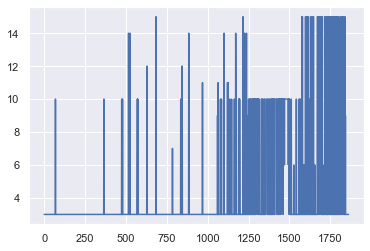

In [150]:
plt.plot(train['sender'])

In [147]:
x = []
for i in range(train.shape[0]):
    if train['sender'][i] < 3:
        x.append(i)

In [148]:
x

[304, 317, 423, 1154]

In [149]:
train.drop(x,axis=0,inplace=True)

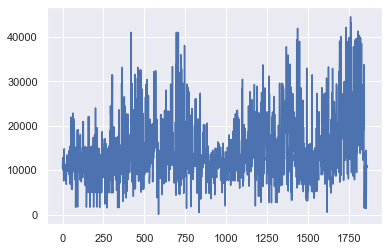

In [151]:
plt.plot(train['body_len'])

In [152]:
train.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'category',
       'product', 'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised',
       'is_quote', 'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
       'target_audience', 'click_rate', 'Morning', 'Noon'],
      dtype='object')

In [160]:
X = train[[ 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'is_weekend', 'category',
       'product', 'no_of_CTA', 'is_image',
       'is_quote',
       'target_audience', 'Morning', 'Noon']]

In [161]:
Y = train['click_rate']

In [162]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [163]:
reg.fit(x_train,y_train)

RandomForestRegressor()

In [164]:
reg.score(x_test,y_test)

0.5119048647774398

In [158]:
test

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,Morning,Noon
0,1889,3,61,12871,11,6,1,6,26,3,...,1,0,0,1,0,0,0,14,0,1
1,1890,3,54,2569,256,5,1,2,11,0,...,0,0,0,0,0,0,0,10,1,0
2,1891,3,88,1473,78,4,0,2,11,0,...,1,0,1,0,0,0,0,10,0,0
3,1892,3,88,1473,78,3,0,2,11,0,...,1,0,1,0,0,0,0,10,0,0
4,1893,3,78,9020,29,3,0,6,26,2,...,0,0,0,0,0,0,0,14,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2646,3,72,9081,46,0,0,15,9,4,...,0,0,0,0,0,0,0,7,0,0
758,2647,3,58,10537,40,3,0,2,11,5,...,0,0,0,0,0,0,0,16,0,0
759,2648,3,100,9132,19,2,0,15,9,2,...,0,0,0,0,0,0,0,15,0,0
760,2649,3,88,1451,75,1,0,2,11,0,...,0,0,1,0,0,0,0,10,0,1


In [165]:
test_x = test[[ 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'is_weekend', 'category',
       'product', 'no_of_CTA', 'is_image',
       'is_quote',
       'target_audience', 'Morning', 'Noon']]

In [175]:
pred2 = reg.predict(test_x)

In [176]:
pred2 = pd.DataFrame(pred2)

In [177]:
pred2 = pd.concat([campaign,pred2],axis=1)

In [179]:
pred2.rename(columns={0:'click_rate'})

,campaign_id,click_rate
0,1889,0.058949
1,1890,0.252365
2,1891,0.233142
3,1892,0.233142
4,1893,0.123926
...,...,...
757,2646,0.015207
758,2647,0.020319
759,2648,0.042701
760,2649,0.260499


In [180]:
sample_submission2 = pred.to_csv(r'C:\Users\Temp\Downloads\csv\Submission12.csv',index=False)

In [181]:
train = pd.read_csv(r'C:\Users\Temp\Downloads\train_F3fUq2S.csv')

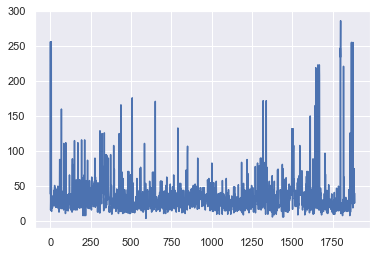

In [183]:
plt.plot(train['mean_paragraph_len'])

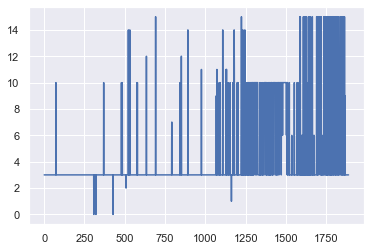

In [184]:
plt.plot(train['sender'])